In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# sam

In [1]:
!pip install torch torchvision torchaudio
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python-headless
!pip install flask flask-cors

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
!git clone https://github.com/facebookresearch/segment-anything.git
%cd segment-anything

Cloning into 'segment-anything'...
remote: Enumerating objects: 295, done.
remote: Total 295 (delta 0), reused 0 (delta 0), pack-reused 295
Receiving objects: 100% (295/295), 18.30 MiB | 24.89 MiB/s, done.
Resolving deltas: 100% (155/155), done.
/content/segment-anything


In [5]:
import cv2
import numpy as np
import torch
from segment_anything import SamPredictor, sam_model_registry
import matplotlib.pyplot as plt
from google.colab import files

# 모델 설정
MODEL_TYPE = "vit_h"  # 모델 유형 지정
CHECKPOINT_PATH = "/content/drive/MyDrive/3조/SAM/sam_vit_h_4b8939.pth"  # 체크포인트 경로 지정
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)
predictor = SamPredictor(sam)

# wedding dress

## wedding dress - mask

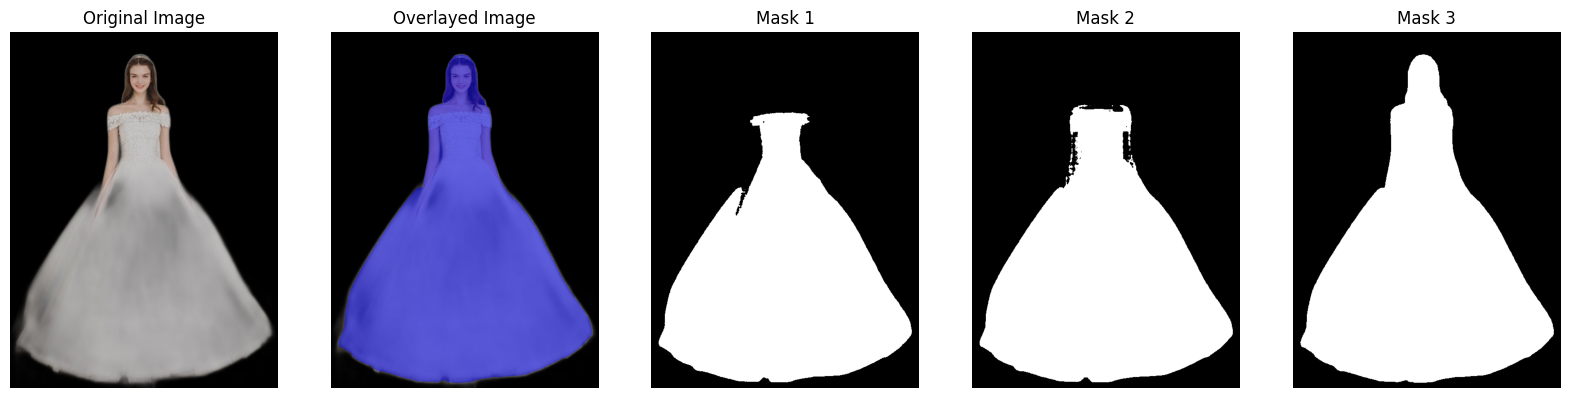

In [7]:
# test
# 원본 이미지 로드
image = cv2.imread("/content/drive/MyDrive/3조/weddingdataset/6 17_off_shoulder/rembg/rembg_20237_00.png")

# 세그먼테이션 수행
predictor.set_image(image)

# 예시로 임의의 포인트 설정 (여기서는 이미지 중심)
height, width, _ = image.shape
input_points = np.array([[width // 2, height // 2]])
input_labels = np.ones(input_points.shape[0])

masks, _, _ = predictor.predict(
    point_coords=input_points,
    point_labels=input_labels,
    multimask_output=True
)

# 모든 마스크 시각화
num_masks = len(masks)
fig, axes = plt.subplots(1, num_masks + 2, figsize=(20, 10))

# 원본 이미지
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis('off')

# 오버레이된 이미지
overlay = image.copy()
for mask in masks:
    overlay[mask == 1] = [255, 0, 0]  # 빨간색으로 오버레이
alpha = 0.5  # 투명도 설정
cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)
axes[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Overlayed Image")
axes[1].axis('off')

# 개별 마스크
for i, mask in enumerate(masks):
    axes[i + 2].imshow(mask, cmap='gray')
    axes[i + 2].set_title(f"Mask {i + 1}")
    axes[i + 2].axis('off')

plt.show()

In [10]:
import os

# 저장 폴더 생성
save_folder = '/content/drive/MyDrive/3조/weddingdataset/6 17_off_shoulder/mini_mask' # 수정필요
os.makedirs(save_folder, exist_ok=True)

for i in range(1,41) :
    # 이미지 불러오기
    image_path = f"/content/drive/MyDrive/3조/weddingdataset/6 17_off_shoulder/mini_image/image_{i}.jpg" # 수정필요
    image = cv2.imread(image_path)

    # 세그먼테이션 수행
    predictor.set_image(image)

    # 예시로 임의의 포인트 설정 (여기서는 이미지 중심)
    height, width, _ = image.shape
    input_points = np.array([[width // 2, height // 2]])
    input_labels = np.ones(input_points.shape[0])

    masks, _, _ = predictor.predict(
        point_coords=input_points,
        point_labels=input_labels,
        multimask_output=True
    )

    # 개별 마스크 저장
    for j in [0,1]:
        mask_path = os.path.join(save_folder, f"mask_{i}_{j + 1}.jpg")
        cv2.imwrite(mask_path, (masks[j] * 255).astype(np.uint8))

AttributeError: 'NoneType' object has no attribute 'shape'

## wedding dress - cloth

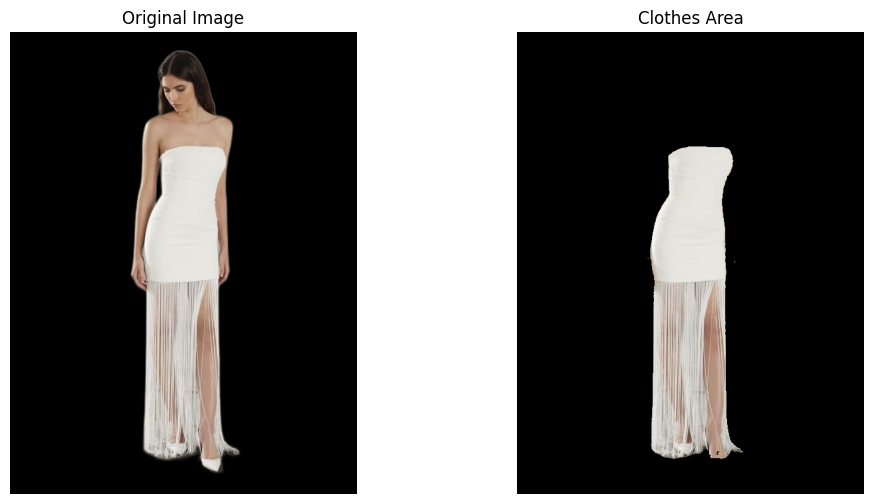

In [ ]:
# test
# 원본 이미지 로드
original_image = cv2.imread("/content/drive/MyDrive/DL project/wedding_dress/rembg/rembg_1.png")

# 이미지 세그먼테이션 수행
predictor.set_image(original_image)

# 예시로 임의의 포인트 설정 (여기서는 이미지 중심)
height, width, _ = original_image.shape
input_points = np.array([[width // 2, height // 2]])
input_labels = np.ones(input_points.shape[0])

masks, _, _ = predictor.predict(
    point_coords=input_points,
    point_labels=input_labels,
    multimask_output=True
)

# 두 번째 마스크를 이용하여 세그먼테이션된 영역 추출
second_mask = masks[1]
segmented_area = original_image.copy()
segmented_area[second_mask != 1] = [0, 0, 0]

# 원본 이미지와 옷 이미지 함께 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 원본 이미지 시각화
ax[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

# 옷 이미지 시각화
ax[1].imshow(cv2.cvtColor(segmented_area, cv2.COLOR_BGR2RGB))
ax[1].set_title('Clothes Area')
ax[1].axis('off')

plt.show()

In [ ]:
import os
import glob

# 저장 폴더 생성
save_folder = '/content/drive/MyDrive/DL project/wedding_dress/cloth' # 수정필요
os.makedirs(save_folder, exist_ok=True)

start_num = 40000

for i in range(1, 132):
    # mask를 정할 이미지 불러오기 - 없으면 다음으로 넘어감
    mask_pattern = f"/content/drive/MyDrive/DL project/wedding_dress/mask/mask_{i}_*.jpg" # 수정필요
    mask_files = glob.glob(mask_pattern)
    if not mask_files:
        print(f"No mask files found for image {i}. Skipping...")
        continue
    mask_path = mask_files[0]
    mask_num = os.path.basename(mask_path)
    num = int(mask_num.split('_')[-1].split('.')[0])

    # 이미지 불러오기
    image_path = f"/content/drive/MyDrive/DL project/wedding_dress/rembg/rembg_{i}.png" # 수정필요
    image = cv2.imread(image_path)

    # 세그먼테이션 수행
    predictor.set_image(image)

    # 예시로 임의의 포인트 설정 (여기서는 이미지 중심)
    height, width, _ = image.shape
    input_points = np.array([[width // 2, height // 2]])
    input_labels = np.ones(input_points.shape[0])

    masks, _, _ = predictor.predict(
        point_coords=input_points,
        point_labels=input_labels,
        multimask_output=True
    )

    #세그먼테이션된 영역 추출 -> cloth
    segmented_area = image.copy()
    if num == 1:
        for mask in masks:
            segmented_area[mask != 1] = [0, 0, 0]
    elif num == 2:
        second_mask = masks[1]
        segmented_area[second_mask != 1] = [0, 0, 0]

    # cloth 저장
    segmented_area_path = os.path.join(save_folder, f"{start_num + i}.jpg")
    cv2.imwrite(segmented_area_path, segmented_area)

No mask files found for image 2. Skipping...
No mask files found for image 3. Skipping...
No mask files found for image 4. Skipping...
No mask files found for image 5. Skipping...
No mask files found for image 6. Skipping...
No mask files found for image 7. Skipping...
No mask files found for image 8. Skipping...
No mask files found for image 15. Skipping...
No mask files found for image 16. Skipping...
No mask files found for image 18. Skipping...
No mask files found for image 32. Skipping...
No mask files found for image 34. Skipping...
No mask files found for image 35. Skipping...
No mask files found for image 41. Skipping...
No mask files found for image 46. Skipping...
No mask files found for image 49. Skipping...
No mask files found for image 51. Skipping...
No mask files found for image 54. Skipping...
No mask files found for image 55. Skipping...
No mask files found for image 58. Skipping...
No mask files found for image 59. Skipping...
No mask files found for image 60. Skippin